# Explorative Data Analysis
For Visualization of the Dataset and some initial transfromation neccessary

In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import sys

current_folder = Path.cwd()
parent_folder = current_folder.parent
sys.path.insert(0, str(parent_folder))
print(parent_folder)

import plotly.io as pio
pio.renderers.keys()
pio.renderers.default = 'notebook' 

import pandas as pd
import numpy as np
import plotly.express as px

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import glob
import os
import seaborn as sns

from utils.clean_numerical import *

/Users/kevinb/Desktop/dsc80/Chatable-Study-Database


# Loading Data & Cleaning Them

In [2]:
current_folder = Path.cwd()
parent_folder = current_folder.parent
os.chdir(parent_folder)
print(parent_folder)

# study time
fall_2022 = pd.read_csv('data/2022_fall_study.csv')
winter_2023 = pd.read_csv('data/2023_winter_study.csv')
spring_2023 = pd.read_csv('data/2023_spring_study.csv')
summer_2023 = pd.read_csv('data/2023_summer_study.csv')
fall_2023 = pd.read_csv('data/2023_fall_study.csv')
winter_2024 = pd.read_csv('data/2024_winter_study.csv')
spring_2024 = pd.read_csv('data/2024_spring_study.csv')
summer_2024 = pd.read_csv('data/2024_summer_study.csv')
fall_2024 = pd.read_csv('data/2024_fall_study.csv')
winter_2025 = pd.read_csv('data/2025_winter_study.csv')
study = pd.concat([fall_2022, winter_2023, spring_2023, summer_2023, fall_2023, winter_2024, spring_2024, summer_2024, fall_2024, winter_2025], axis=0)

# data_dir = 'data'
# file_pattern = os.path.join(data_dir, '*_study.csv')
# csv_files = glob.glob(file_pattern)
# csv_files.sort()
# df_list = [pd.read_csv(file) for file in csv_files]
# study = pd.concat(df_list, axis=0, ignore_index=True)
# print(f"Total records: {study.shape[0]}")

/Users/kevinb/Desktop/dsc80/Chatable-Study-Database


In [3]:
clean_study = study.pipe(transform_study)
clean_study.head()

/Users/kevinb/Desktop/dsc80/Chatable-Study-Database/utils/clean_numerical.py:115: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



date     total      doc1     cogs9  pp_fall22   exam  \
0 2022-10-21  1.800000  0.000000  0.000000   0.000000  0.525   
1 2022-10-22  4.550000  0.000000  0.000000   0.000000  0.000   
2 2022-10-23  2.375000  0.208333  0.000000   0.000000  0.000   
3 2022-10-24  2.450000  0.250000  0.158333   0.000000  0.000   
4 2022-10-25  3.691667  0.100000  0.000000   0.483333  0.000   

   reading_winter23  pp_winter23  math20c  dsc20  ...  math190a  math189  \
0               0.0          0.0      0.0    0.0  ...       0.0      0.0   
1               0.0          0.0      0.0    0.0  ...       0.0      0.0   
2               0.0          0.0      0.0    0.0  ...       0.0      0.0   
3               0.0          0.0      0.0    0.0  ...       0.0      0.0   
4               0.0          0.0      0.0    0.0  ...       0.0      0.0   

   cse257_winter25  cse251b  cse234  cogs164  cogs101a    math18  dsc10  \
0              0.0      0.0     0.0      0.0       0.0  1.025000  0.225   
1              0.0      0.0     0.0      0.0       0.0  0.608333  1.700   
2              0.0      0.0     0.0      0.0       0.0  0.612500  0.875   
3              0.0      0.0     0.0      0.0       0.0  1.475000  0.250   
4              0.0      0.0     0.0      0.0       0.0  1.125000  0.750   

    math20b  
0  0.208333  
1  1.125000  
2  0.558333  
3  0.191667  
4  1.216667  

[5 rows x 90 columns]

In [4]:
df = clean_study.drop(columns=['total','exam','week'])

# selecting 77 entries from the start of non-zero values for each column
relevant_data = pd.DataFrame(index=range(77))

for column in df.columns:
    if df[column].dtype in [np.float64, np.int64]:  # Only apply to numeric columns
        start_index = df[column].ne(0).idxmax()  # Find first non-zero index
        # Check if there are at least 77 entries to slice, if not, adjust the range
        end_index = min(start_index + 77, len(df))
        relevant_data[column] = df[column][start_index:end_index].reset_index(drop=True)

# median, mean, max, min, and standard deviation
statistics = {}
for column in relevant_data.columns:
    if relevant_data[column].dtype in [np.float64, np.int64]:  # Apply only to numeric columns
        statistics[column] = {
            'Mean': relevant_data[column].mean(),
            'Max': relevant_data[column].max(),
            'Standard Deviation': relevant_data[column].std()
        }

stats_df = pd.DataFrame(statistics).T
stats_df = stats_df.sort_index()
stats_df.head()

Mean       Max  Standard Deviation
bild1     0.278355  1.833333            0.398958
bild22    0.249567  3.000000            0.580740
cogs101a  0.622146  4.166667            0.814732
cogs107a  0.272727  2.500000            0.542701
cogs107b  0.626623  3.333333            0.906504

In [5]:
clean_study

date      total      doc1     cogs9  pp_fall22   exam  \
0   2022-10-21   1.800000  0.000000  0.000000   0.000000  0.525   
1   2022-10-22   4.550000  0.000000  0.000000   0.000000  0.000   
2   2022-10-23   2.375000  0.208333  0.000000   0.000000  0.000   
3   2022-10-24   2.450000  0.250000  0.158333   0.000000  0.000   
4   2022-10-25   3.691667  0.100000  0.000000   0.483333  0.000   
..         ...        ...       ...       ...        ...    ...   
704 2025-03-16   9.500000  0.000000  0.000000   0.000000  0.000   
705 2025-03-17  11.166667  0.000000  0.000000   0.000000  0.000   
706 2025-03-18  10.583333  0.000000  0.000000   0.000000  0.000   
707 2025-03-19  11.000000  0.000000  0.000000   0.000000  0.000   
708 2025-03-20  12.500000  0.000000  0.000000   0.000000  0.000   

     reading_winter23  pp_winter23  math20c  dsc20  ...  math190a  math189  \
0                 0.0          0.0      0.0    0.0  ...       0.0      0.0   
1                 0.0          0.0      0.0    0.0  ...       0.0      0.0   
2                 0.0          0.0      0.0    0.0  ...       0.0      0.0   
3                 0.0          0.0      0.0    0.0  ...       0.0      0.0   
4                 0.0          0.0      0.0    0.0  ...       0.0      0.0   
..                ...          ...      ...    ...  ...       ...      ...   
704               0.0          0.0      0.0    0.0  ...       0.0      1.5   
705               0.0          0.0      0.0    0.0  ...       0.0      0.0   
706               0.0          0.0      0.0    0.0  ...       0.0      0.0   
707               0.0          0.0      0.0    0.0  ...       0.0      0.0   
708               0.0          0.0      0.0    0.0  ...       0.0      0.0   

     cse257_winter25   cse251b  cse234  cogs164  cogs101a    math18  dsc10  \
0                0.0  0.000000     0.0      0.0  0.000000  1.025000  0.225   
1                0.0  0.000000     0.0      0.0  0.000000  0.608333  1.700   
2                0.0  0.000000     0.0      0.0  0.000000  0.612500  0.875   
3                0.0  0.000000     0.0      0.0  0.000000  1.475000  0.250   
4                0.0  0.000000     0.0      0.0  0.000000  1.125000  0.750   
..               ...       ...     ...      ...       ...       ...    ...   
704              0.0  3.000000     0.0      0.0  1.500000  0.000000  0.000   
705              0.0  6.000000     0.0      0.0  4.166667  0.000000  0.000   
706              0.0  3.000000     0.0      0.0  0.000000  0.000000  0.000   
707              0.0  7.000000     0.0      0.0  0.000000  0.000000  0.000   
708              0.0  9.166667     0.0      0.0  0.000000  0.000000  0.000   

      math20b  
0    0.208333  
1    1.125000  
2    0.558333  
3    0.191667  
4    1.216667  
..        ...  
704  0.000000  
705  0.000000  
706  0.000000  
707  0.000000  
708  0.000000  

[709 rows x 90 columns]

# General EDA & Plotting Trends

In [6]:
# Map colors to the statistics DataFrame
stats_df['Color'] = [GROUP_COLOR_MAP.get(COL_GROUP.get(col), 'gray') for col in stats_df.index]
stats_df = stats_df.reset_index()

In [7]:
stats_df.head()

index      Mean       Max  Standard Deviation   Color
0     bild1  0.278355  1.833333            0.398958  purple
1    bild22  0.249567  3.000000            0.580740  purple
2  cogs101a  0.622146  4.166667            0.814732  purple
3  cogs107a  0.272727  2.500000            0.542701  purple
4  cogs107b  0.626623  3.333333            0.906504  purple

*Currently we need to manually add colors in `utils.clean_numerical.py` first for labeling data to different categories.

In [8]:
# Sort by Color
stats_df.sort_values(by=['Color', 'index'], inplace=True, ascending=False)

fig = make_subplots(
    rows=3, cols=1,
    subplot_titles=("Maximum Study Time Per Day","Mean Study Time Per Day","Standard Deviation Study Time Per Day"),
    vertical_spacing=0.02  # Adjust spacing to your preference
)

unique_colors = stats_df['Color'].unique()
color_labels = {color: group for group, color in GROUP_COLOR_MAP.items()}

# Plotting each statistic with a trace for each color
for i, stat in enumerate(['Max', 'Mean', 'Standard Deviation']):
    for color in unique_colors:
        filtered_df = stats_df[stats_df['Color'] == color]
        fig.add_trace(
            go.Bar(
                x=filtered_df[stat],
                y=filtered_df['index'],
                orientation='h',
                marker_color=color,
                name=color_labels[color],
                showlegend=(i == 0)  # Show legend only in the first subplot to avoid duplicates
            ),
            row=i+1, col=1
        )

# Update layout for clear visualization
fig.update_layout(height=4000, width=1000, showlegend=True, title_text="Statistical Measures For Each Class's Study Time")
fig.update_xaxes(showgrid=True)
fig.show()

In [9]:
fig = px.violin(clean_study, y='total', title='Total Study Time Distribution')
fig.update_layout(showlegend=True, xaxis_title='Distributionr', yaxis_title='Totao Study Time Per Day')
fig.update_xaxes(showgrid=True)
fig.show()

# Temporal Pattern Analysis

In [10]:
import calendar

clean_study['year'] = clean_study['date'].dt.year
clean_study['season'] = clean_study['date'].dt.quarter
clean_study['month'] = clean_study['date'].dt.month
clean_study['weekday'] = clean_study['date'].dt.weekday
clean_study['week_number'] =  clean_study['date'].dt.isocalendar().week


## Trends in Years

In [11]:
fig = px.scatter(clean_study, x='date',y='total',trendline='lowess')
fig.update_layout(showlegend=True, title_text="Total Study Time Progression", xaxis_title='date', yaxis_title='Totao Study Time Per Day')
fig.update_xaxes(showgrid=True)
fig.show()

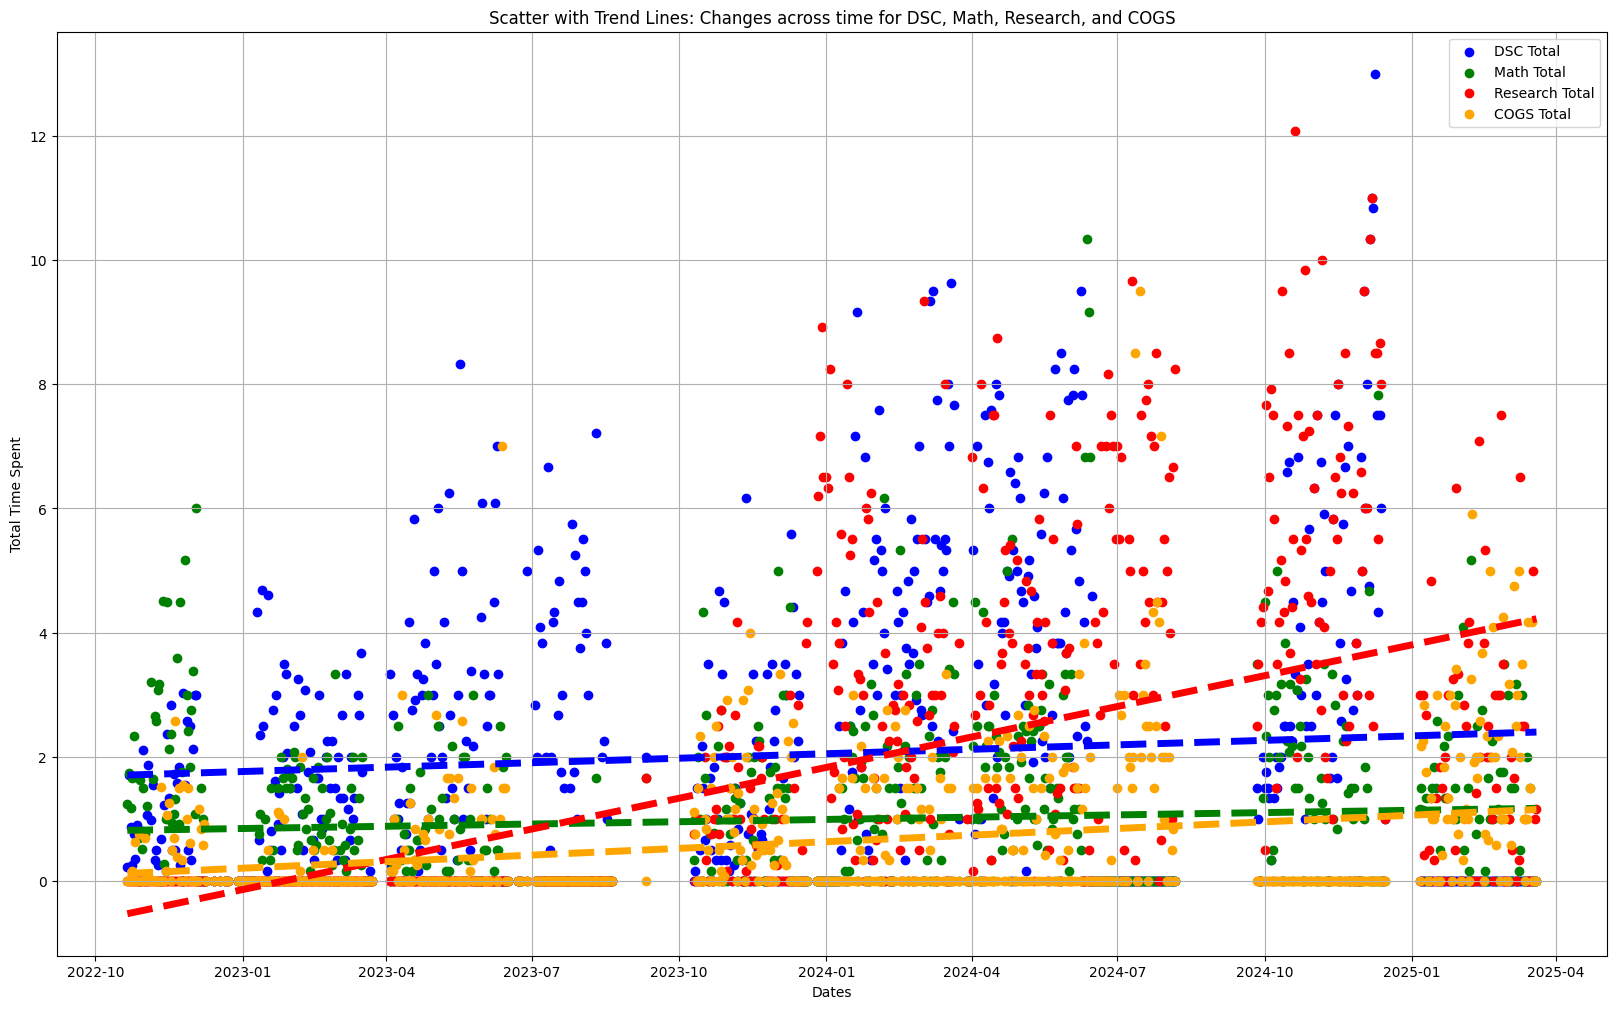

In [12]:
import matplotlib.pyplot as plt

df = clean_study
dsc_cols = [col for col in df.columns if 'ds' in col]
math_cols = [col for col in df.columns if 'math' in col]
research_cols = [col for col in df.columns if ('salk' in col) |
                 ('cse150b' in col) | ('fmp' in col) | ('cl' in col) | ('cse257' in col) | 
                 ('dsc190' in col) | ('sof' in col) | ('track-mjx' in col)]
cogs_cols = [col for col in df.columns if 'cogs' in col]

df['dsc_total'] = df[dsc_cols].sum(axis=1)
df['math_total'] = df[math_cols].sum(axis=1)
df['salk_total'] = df[research_cols].sum(axis=1)
df['cogs_total'] = df[cogs_cols].sum(axis=1)

plt.figure(figsize=(20, 12))

# Scatter plots
plt.scatter(df['date'], df['dsc_total'], label='DSC Total', color='blue')
plt.scatter(df['date'], df['math_total'], label='Math Total', color='green')
plt.scatter(df['date'], df['salk_total'], label='Research Total', color='red')
plt.scatter(df['date'], df['cogs_total'], label='COGS Total', color='orange')  # New scatter plot for COGS

# Trend lines (linear regression)
df['date_num'] = pd.to_numeric(pd.to_datetime(df['date']))

# DSC trend line
z_dsc = np.polyfit(df['date_num'], df['dsc_total'], 1)
p_dsc = np.poly1d(z_dsc)
plt.plot(df['date'], p_dsc(df['date_num']), color='blue', linestyle='dashed', linewidth=5)  # Thicker line

# Math trend line
z_math = np.polyfit(df['date_num'], df['math_total'], 1)
p_math = np.poly1d(z_math)
plt.plot(df['date'], p_math(df['date_num']), color='green', linestyle='dashed', linewidth=5)

# Research trend line
z_salk = np.polyfit(df['date_num'], df['salk_total'], 1)
p_salk = np.poly1d(z_salk)
plt.plot(df['date'], p_salk(df['date_num']), color='red', linestyle='dashed', linewidth=5)

# COGS trend line
z_cogs = np.polyfit(df['date_num'], df['cogs_total'], 1)
p_cogs = np.poly1d(z_cogs)
plt.plot(df['date'], p_cogs(df['date_num']), color='orange', linestyle='dashed', linewidth=5)

plt.xlabel('Dates')
plt.ylabel('Total Time Spent')
plt.title('Scatter with Trend Lines: Changes across time for DSC, Math, Research, and COGS')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
grouped = clean_study.assign(week_of_year = clean_study['date'].dt.weekofyear)
group_by_week = grouped.groupby('week_of_year').max().reset_index()
fig = px.scatter(group_by_week, x='week_of_year',y='total',trendline='lowess')
fig.update_layout(showlegend=True, title_text="'Max of Single Day Study Time Over Time'", xaxis_title='Week of Year', yaxis_title='Totao Study Time Per Day')
fig.update_xaxes(showgrid=True)
fig.show()

/var/folders/yt/5gdjwln55x9_stgx851x0yb80000gn/T/ipykernel_97655/2811050891.py:1: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.



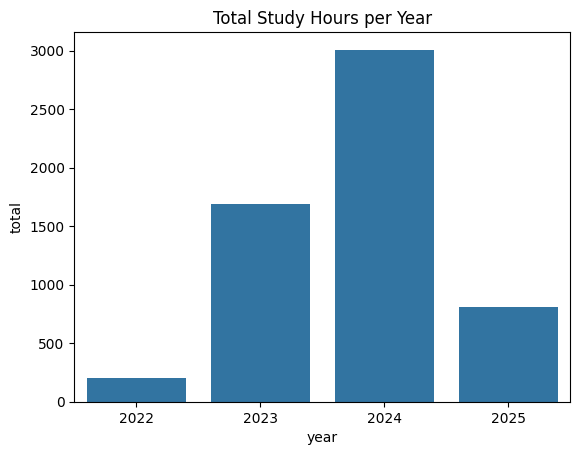

In [14]:
yearly_total = clean_study.groupby('year')['total'].sum().reset_index()
sns.barplot(data=yearly_total, x='year', y='total')
plt.title('Total Study Hours per Year')
plt.show()

## Trends in Seasons

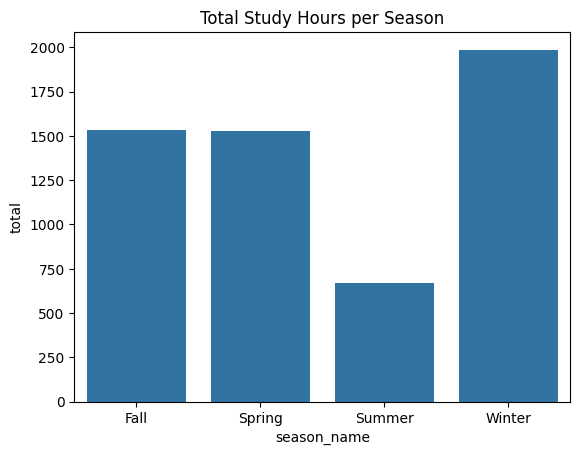

In [15]:
seasons = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
clean_study['season_name'] = clean_study['season'].map(seasons)
seasonal_total = clean_study.groupby('season_name')['total'].sum().reset_index()
sns.barplot(data=seasonal_total, x='season_name', y='total')
plt.title('Total Study Hours per Season')
plt.show()

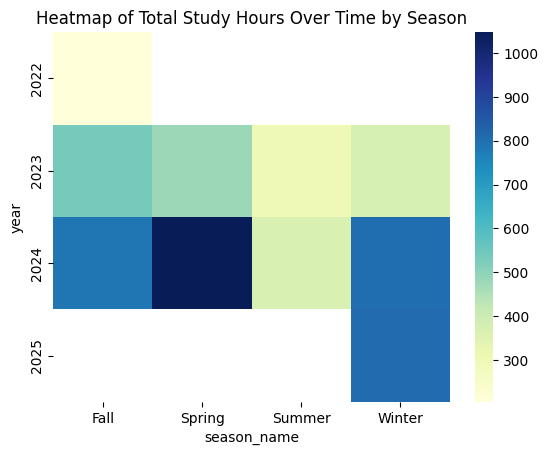

In [16]:
pivot_table = clean_study.pivot_table(index='year', columns='season_name', values='total', aggfunc='sum')
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.title('Heatmap of Total Study Hours Over Time by Season')
plt.show()

## Heatmap of Study Hours By Weekday Compare to Week Numbers

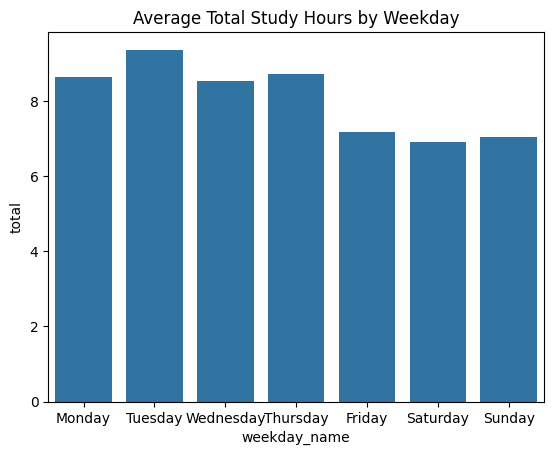

In [17]:
weekday_avg = clean_study.groupby('weekday')['total'].mean().reset_index()
weekday_avg['weekday_name'] = weekday_avg['weekday'].apply(lambda x: calendar.day_name[x])

sns.barplot(data=weekday_avg, x='weekday_name', y='total')
plt.title('Average Total Study Hours by Weekday')
plt.show()

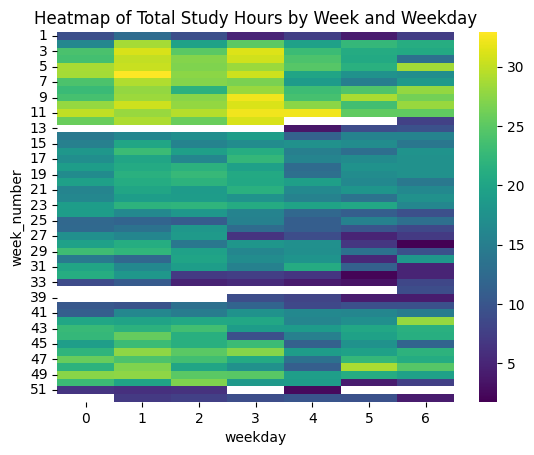

In [18]:
pivot_weekday = clean_study.pivot_table(index='week_number', columns='weekday', values='total', aggfunc='sum')

sns.heatmap(pivot_weekday, cmap='viridis')
plt.title('Heatmap of Total Study Hours by Week and Weekday')
plt.show()

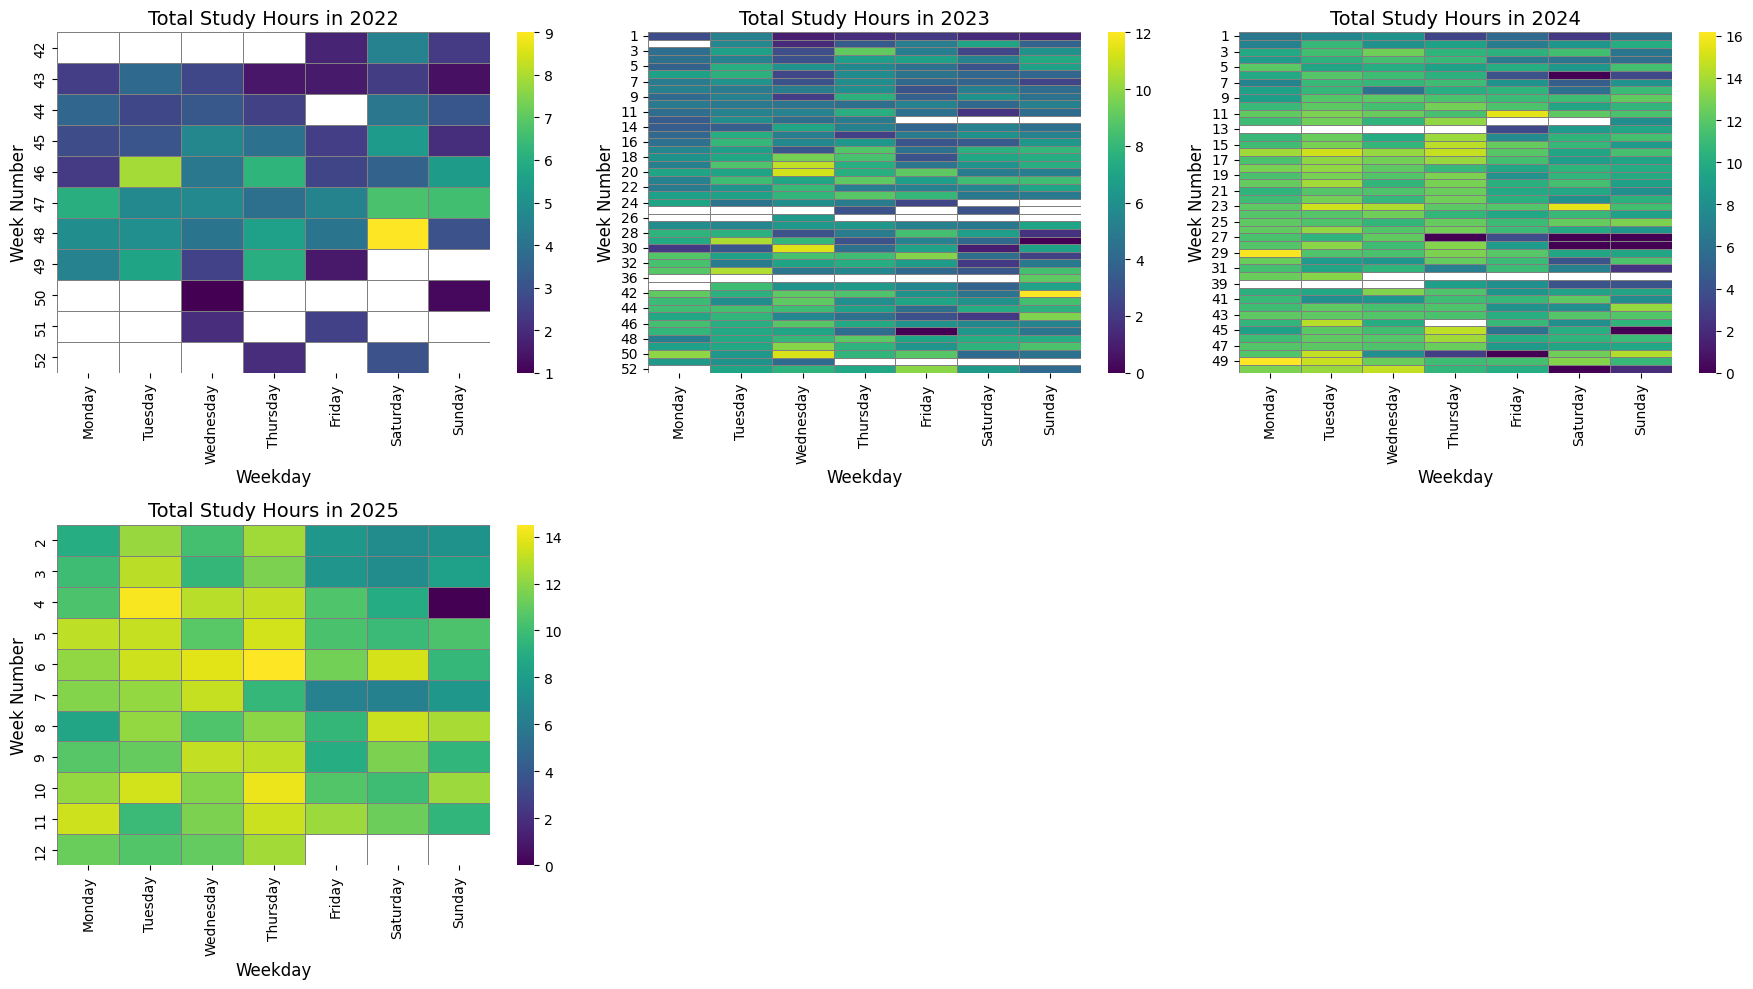

In [19]:
def plot_yearly_heatmaps(df, years, cols=3, cmap='viridis'):
    '''Plot heatmap per year'''
    
    num_years = len(years)
    rows = (num_years + cols - 1) // cols  # ceiling division
    
    plt.figure(figsize=(cols * 6, rows * 5))
    
    for idx, year in enumerate(years):
        plt.subplot(rows, cols, idx + 1)
        
        df_year = df[df['year'] == year]
        
        # pivot table: index=week_number, columns=weekday, values=total
        pivot_weekday = df_year.pivot_table(
            index='week_number',
            columns='weekday',
            values='total',
            aggfunc='sum'
        )
        
        # map numerical weekdays to names
        pivot_weekday.columns = [calendar.day_name[int(day)] for day in pivot_weekday.columns]
        
        # make sure that weekdays are ordered correctly
        ordered_weekdays = list(calendar.day_name)
        pivot_weekday = pivot_weekday.reindex(columns=ordered_weekdays)
        
        sns.heatmap(pivot_weekday, cmap=cmap, linewidths=.5, linecolor='gray', cbar=True)
        
        plt.title(f'Total Study Hours in {year}', fontsize=14)
        plt.xlabel('Weekday', fontsize=12)
        plt.ylabel('Week Number', fontsize=12)
    
    plt.tight_layout()
    plt.show()


years = sorted(clean_study['year'].unique())
plot_yearly_heatmaps(clean_study, years, cols=3, cmap='viridis')

## Rolling Window of 30 Days Trend Over the Years

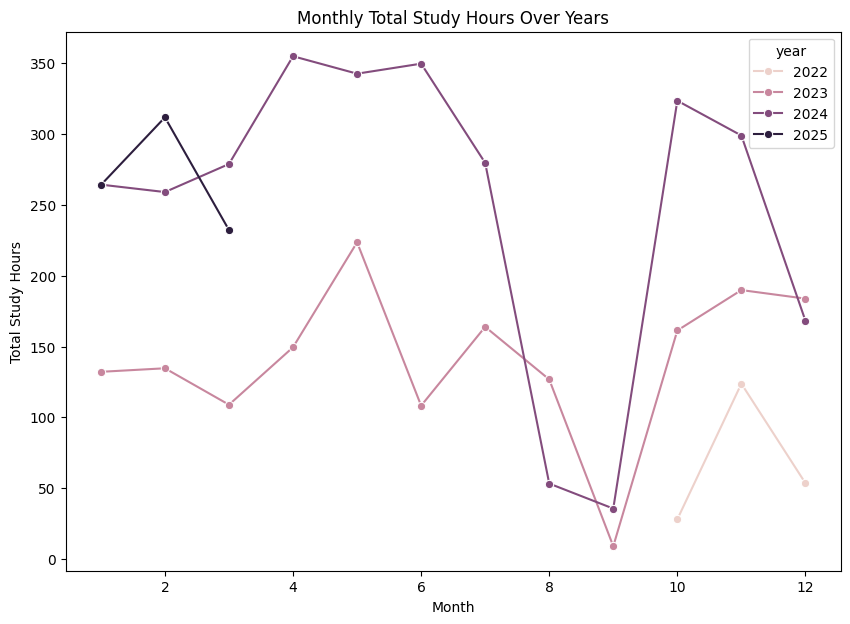

In [20]:
monthly_total = clean_study.groupby(['year', 'month'])['total'].sum().reset_index()
monthly_total['month_name'] = monthly_total['month'].apply(lambda x: calendar.month_name[x])

plt.figure(figsize=(10, 7))
sns.lineplot(data=monthly_total, x='month', y='total', hue='year', marker='o')
plt.title('Monthly Total Study Hours Over Years')
plt.xlabel('Month')
plt.ylabel('Total Study Hours')
plt.show()

## Checking Exam's Effects

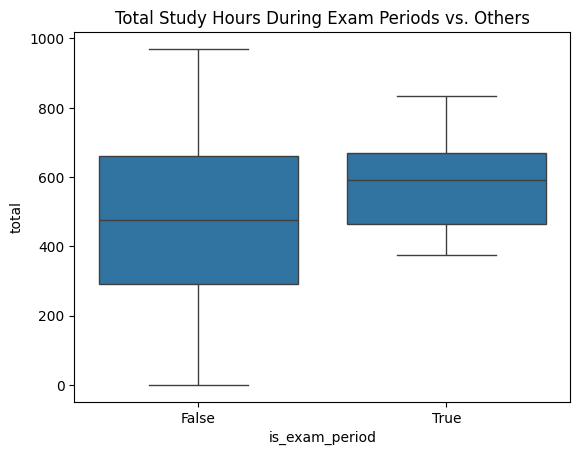

In [21]:
exam_periods = [
    ('2023-12-01', '2023-12-15'),
    ('2024-05-01', '2024-05-15'),
    
]

study['is_exam_period'] = False
for start, end in exam_periods:
    study.loc[(study['date'] >= start) & (study['date'] <= end), 'is_exam_period'] = True

# Compare study hours during exam periods
sns.boxplot(data=study, x='is_exam_period', y='total')
plt.title('Total Study Hours During Exam Periods vs. Others')
plt.show()

# Dimensionality Reduction

| **Technique**       | **Type**      | **Supervised** | **Preserves Local Structure** | **Preserves Global Structure** | **Best For**                                      |
|:--------------------|:-------------:|:---------------:|:------------------------------:|:--------------------------------:|:-------------------------------------------------|
| **PCA**             | Linear        | No              | Moderate                      | High                             | Data compression, noise reduction                |
| **t-SNE**           | Non-Linear    | No              | High                          | Low                              | Visualization of clusters                        |
| **UMAP**            | Non-Linear    | No              | High                          | Moderate to High                 | Visualization, preserving more structure         |
| **LDA**             | Linear        | Yes             | Moderate                      | High                             | Classification, maximizing class separation      |
| **Factor Analysis** | Linear        | No              | Low                           | Moderate                         | Identifying latent factors                       |
| **NMF**             | Linear        | No              | Moderate                      | Low                              | Parts-based representation, interpretability      |
| **ICA**             | Linear        | No              | High                          | Low                              | Signal separation, feature extraction            |
| **Autoencoders**    | Non-Linear    | No              | High                          | High                             | Complex data representations, anomaly detection   |
| **Kernel PCA**      | Non-Linear    | No              | Moderate to High              | Moderate                         | Non-linear data structures                       |


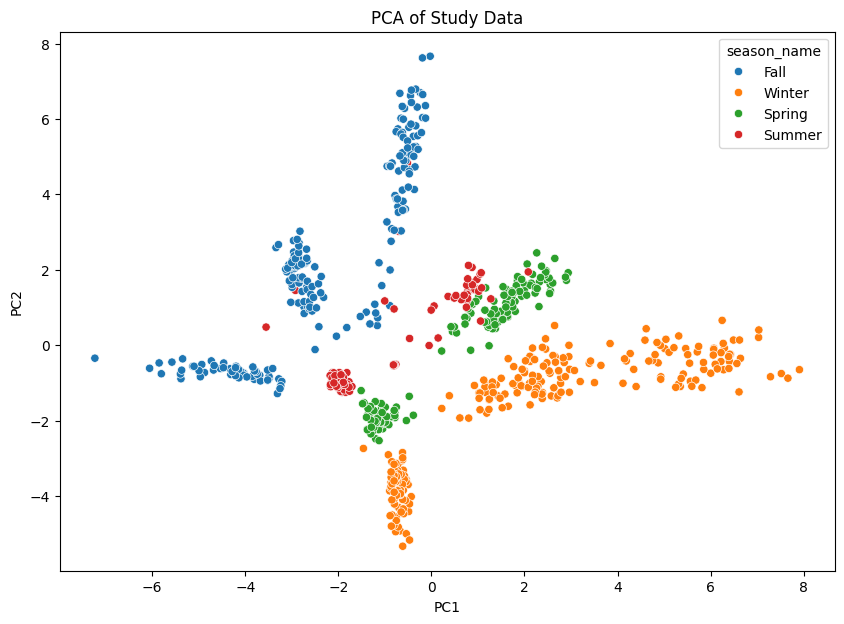

[0.07099214 0.05972386]


In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

numerical_cols = clean_study.select_dtypes(include=['number']).columns.tolist()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clean_study[numerical_cols])

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
clean_study['PC1'] = principal_components[:, 0]
clean_study['PC2'] = principal_components[:, 1]

plt.figure(figsize=(10, 7))
sns.scatterplot(data=clean_study, x='PC1', y='PC2', hue='season_name')
plt.title('PCA of Study Data')
plt.show()

print(pca.explained_variance_ratio_)

Explained Variance Ratio: [0.07099214 0.05972386 0.04596165]
Total Explained Variance: 0.17667765947280167


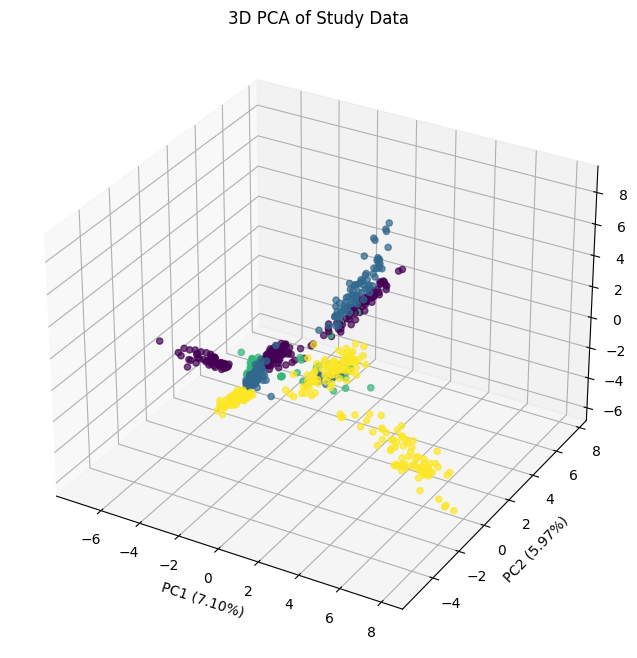

In [23]:
pca = PCA(n_components=3)
principal_components = pca.fit_transform(scaled_data)

clean_study['PC1'] = principal_components[:, 0]
clean_study['PC2'] = principal_components[:, 1]
clean_study['PC3'] = principal_components[:, 2]

print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Explained Variance:", sum(pca.explained_variance_ratio_))

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    clean_study['PC1'],
    clean_study['PC2'],
    clean_study['PC3'],
    c=clean_study['season_name'].astype('category').cat.codes,  # Convert categories to numeric codes for coloring
    cmap='viridis',
    alpha=0.7
)

ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
ax.set_zlabel(f'PC3 ({pca.explained_variance_ratio_[2]*100:.2f}%)')
ax.set_title('3D PCA of Study Data')

legend1 = ax.legend(*scatter.legend_elements(),
                    title="Seasons", loc="upper right", bbox_to_anchor=(1.15, 1))
ax.add_artist(legend1)

plt.show()

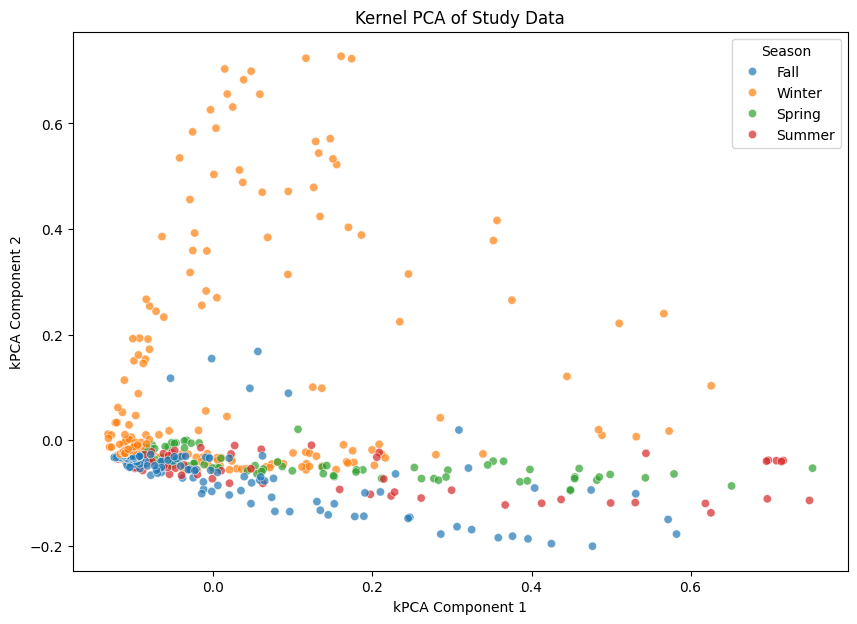

In [24]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04, random_state=42)
kpca_results = kpca.fit_transform(scaled_data)

clean_study['kPCA1'] = kpca_results[:, 0]
clean_study['kPCA2'] = kpca_results[:, 1]

plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='kPCA1', y='kPCA2',
    hue='season_name',
    data=clean_study,
    legend='full',
    alpha=0.7
)
plt.title('Kernel PCA of Study Data')
plt.xlabel('kPCA Component 1')
plt.ylabel('kPCA Component 2')
plt.legend(title='Season')
plt.show()


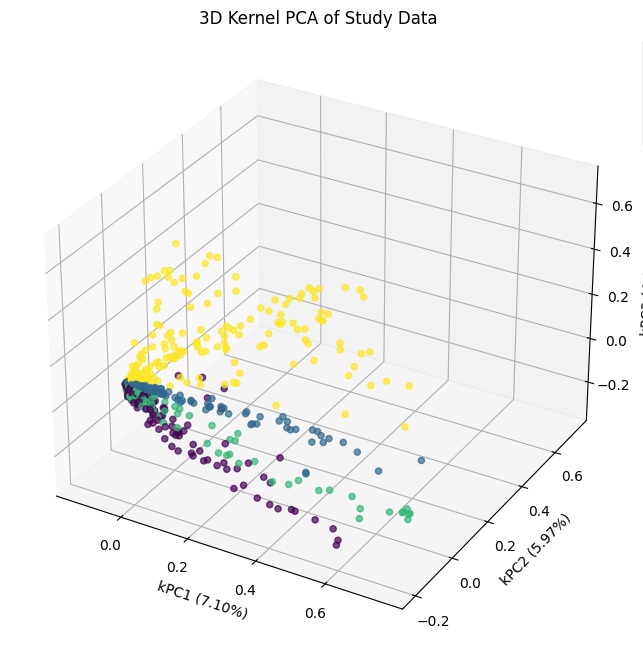

In [25]:
kpca = KernelPCA(n_components=3, kernel='rbf', gamma=0.04, random_state=42)
kpca_results = kpca.fit_transform(scaled_data)

clean_study['kPCA1'] = kpca_results[:, 0]
clean_study['kPCA2'] = kpca_results[:, 1]
clean_study['kPCA3'] = kpca_results[:, 2]

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    clean_study['kPCA1'],
    clean_study['kPCA2'],
    clean_study['kPCA3'],
    c=clean_study['season_name'].astype('category').cat.codes,  # Convert categories to numeric codes for coloring
    cmap='viridis',
    alpha=0.7
)

ax.set_xlabel(f'kPC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
ax.set_ylabel(f'kPC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
ax.set_zlabel(f'kPC3 ({pca.explained_variance_ratio_[2]*100:.2f}%)')
ax.set_title('3D Kernel PCA of Study Data')

legend1 = ax.legend(*scatter.legend_elements(),
                    title="Seasons", loc="upper right", bbox_to_anchor=(1.15, 1))
ax.add_artist(legend1)

plt.show()

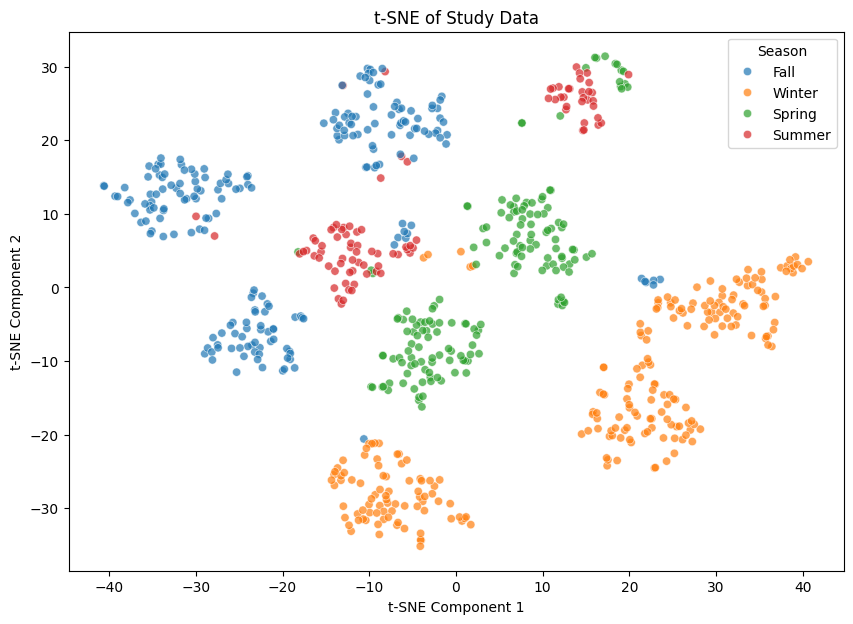

In [26]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_results = tsne.fit_transform(scaled_data)

clean_study['tSNE1'] = tsne_results[:, 0]
clean_study['tSNE2'] = tsne_results[:, 1]

plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='tSNE1', y='tSNE2',
    hue='season_name',
    data=clean_study,
    legend='full',
    alpha=0.7
)
plt.title('t-SNE of Study Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Season')
plt.show()

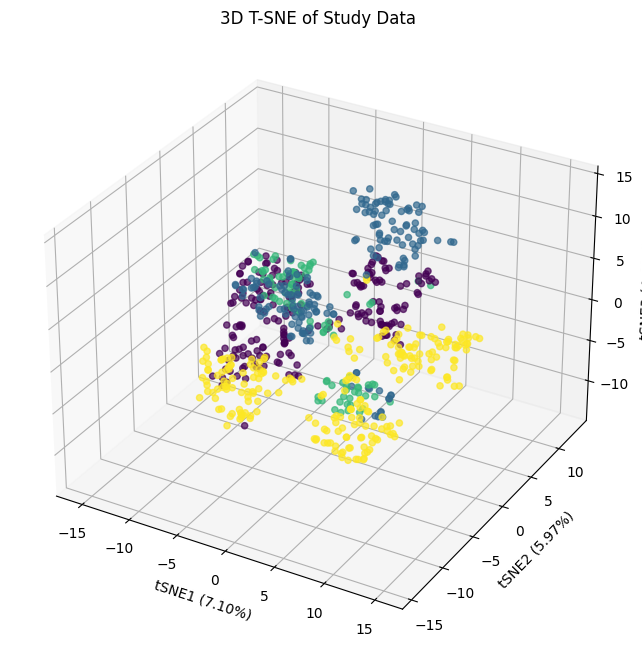

In [27]:
tsne = TSNE(n_components=3, random_state=42, perplexity=30, n_iter=1000)
tsne_results = tsne.fit_transform(scaled_data)

clean_study['tSNE1'] = tsne_results[:, 0]
clean_study['tSNE2'] = tsne_results[:, 1]
clean_study['tSNE3'] = tsne_results[:, 2]

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    clean_study['tSNE1'],
    clean_study['tSNE2'],
    clean_study['tSNE3'],
    c=clean_study['season_name'].astype('category').cat.codes,  # Convert categories to numeric codes for coloring
    cmap='viridis',
    alpha=0.7
)

ax.set_xlabel(f'tSNE1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
ax.set_ylabel(f'tSNE2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
ax.set_zlabel(f'tSNE3 ({pca.explained_variance_ratio_[2]*100:.2f}%)')
ax.set_title('3D T-SNE of Study Data')

legend1 = ax.legend(*scatter.legend_elements(),
                    title="Seasons", loc="upper right", bbox_to_anchor=(1.15, 1))
ax.add_artist(legend1)

plt.show()

/Users/kevinb/miniforge3/envs/ucsd_study/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

/Users/kevinb/miniforge3/envs/ucsd_study/lib/python3.8/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


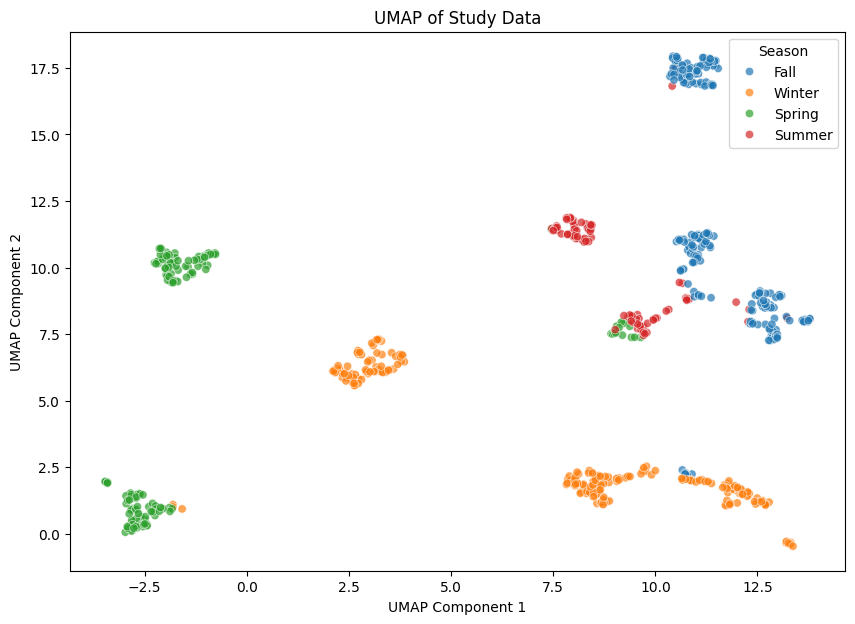

In [28]:
import umap

umap_reducer = umap.UMAP(n_components=2, random_state=42, n_neighbors=15, min_dist=0.1)
umap_results = umap_reducer.fit_transform(scaled_data)

clean_study['UMAP1'] = umap_results[:, 0]
clean_study['UMAP2'] = umap_results[:, 1]

plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='UMAP1', y='UMAP2',
    hue='season_name',
    data=clean_study,
    legend='full',
    alpha=0.7
)
plt.title('UMAP of Study Data')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.legend(title='Season')
plt.show()

---
---